# Navigation

---

You are welcome to use this coding environment to train your agent for the project.  Follow the instructions below to get started!

### 1. Start the Environment

Run the next code cell to install a few packages.  This line will take a few minutes to run!

In [3]:
!pip -q install ./python
!pip install unityagents

You are using pip version 9.0.1, however version 18.1 is available.
You should consider upgrading via the 'pip install --upgrade pip' command.


The environment is already saved in the Workspace and can be accessed at the file path provided below.  Please run the next code cell without making any changes.

In [4]:
from unityagents import UnityEnvironment
import numpy as np

# please do not modify the line below
env = UnityEnvironment(file_name="/data/Banana_Linux_NoVis/Banana.x86_64")

INFO:unityagents:
'Academy' started successfully!
Unity Academy name: Academy
        Number of Brains: 1
        Number of External Brains : 1
        Lesson number : 0
        Reset Parameters :
		
Unity brain name: BananaBrain
        Number of Visual Observations (per agent): 0
        Vector Observation space type: continuous
        Vector Observation space size (per agent): 37
        Number of stacked Vector Observation: 1
        Vector Action space type: discrete
        Vector Action space size (per agent): 4
        Vector Action descriptions: , , , 


Environments contain **_brains_** which are responsible for deciding the actions of their associated agents. Here we check for the first brain available, and set it as the default brain we will be controlling from Python.

In [5]:
# get the default brain
brain_name = env.brain_names[0]
brain = env.brains[brain_name]

# Create agent

In [6]:
import torch
from dqn_agent import Agent
checkpoint_name = "checkpoint.pth"

agent = Agent(state_size=37, action_size=4, seed=0)
env_info = env.reset(train_mode=True)[brain_name]
state = env_info.vector_observations[0]  

# Load Agent

In [7]:
#agent.qnetwork_local.load_state_dict(torch.load(checkpoint_name))

In [11]:
from collections import deque
   
def display_metrics(i_episode, rewards_window, actions_window, scores_window, eps):
    #print("rewards_window+1", np.add(rewards_window, 1))
    rewards_bc = np.append(np.bincount(np.add(rewards_window, 1)),[0,0])
    forward_count_percent = np.bincount(actions_window)[0]/1000.0*100
    print('\rEpisode {}\tAverage Score: {:.2f}\teps: {:.4f}\tBlues:{}\tNone:{}\tYellows:{}\t%Forward:{:.1f}'
                  .format(i_episode, np.mean(scores_window), eps, rewards_bc[0],rewards_bc[1], 
                          rewards_bc[2], forward_count_percent))
            
def save_model(checkpoint):
    torch.save(agent.qnetwork_local.state_dict(), checkpoint)

def dqn(n_episodes=500, max_t=300, eps_start=1.0, eps_end=0.01, eps_decay=0.995):
    """Deep Q-Learning.
    
    Params
    ======
        n_episodes (int): maximum number of training episodes
        max_t (int): maximum number of timesteps per episode
        eps_start (float): starting value of epsilon, for epsilon-greedy action selection
        eps_end (float): minimum value of epsilon
        eps_decay (float): multiplicative factor (per episode) for decreasing epsilon
    """
    scores = []                        # list containing scores from each episode
    scores_window = deque(maxlen=100)  # last 100 scores
    rewards_window = deque(maxlen=1000)# This is for debug and lets one get a better idea of optimality
    actions_window = deque(maxlen=1000)# This is to track what actions are happening 
    eps = eps_start                    # initialize epsilon
    for i_episode in range(1, n_episodes+1):
        env_info = env.reset(train_mode=True)[brain_name]
        state = env_info.vector_observations[0]  
        score = 0
        for t in range(max_t):
            action = agent.act(state, eps)
            actions_window.append(action)
            env_info = env.step(action)[brain_name]
            next_state = env_info.vector_observations[0]   # get the next state
            reward = env_info.rewards[0]                   # get the reward
            rewards_window.append(int(reward))
            done = env_info.local_done[0]
            agent.step(state, action, reward, next_state, done)
            state = next_state
            score += reward
            if done:
                # Done happens at t=299
                break 
        scores_window.append(score)       # save most recent score
        scores.append(score)              # save most recent score
        eps = max(eps_end, eps_decay*eps) # decrease epsilon
        print('\rEpisode {}\tAverage Score: {:.2f}\teps: {:.4f}'.format(i_episode, np.mean(scores_window), eps), end="")
        if i_episode % 100 == 0:
            display_metrics(i_episode, rewards_window, actions_window, scores_window, eps)
            save_model(checkpoint_name)
        if np.mean(scores_window) > 13:
            save_model(checkpoint_name)
            print("\nThe environment was solved in {} episodes with a score of {:.2f}".format(i_episode, np.mean(scores_window)))
            break
    return scores

In [12]:
scores = dqn(1000, 300, 1.0, eps_decay=.995)

Episode 100	Average Score: 1.79	eps: 0.6058	Blues:2	None:978	Yellows:20	%Forward:40.4
Episode 200	Average Score: 5.85	eps: 0.3670	Blues:1	None:977	Yellows:22	%Forward:37.3
Episode 300	Average Score: 8.50	eps: 0.2223	Blues:2	None:956	Yellows:42	%Forward:50.7
Episode 400	Average Score: 10.95	eps: 0.1347	Blues:1	None:960	Yellows:39	%Forward:62.3
Episode 496	Average Score: 13.01	eps: 0.0832
The environment was solved in 496 episodes with a score of 13.01


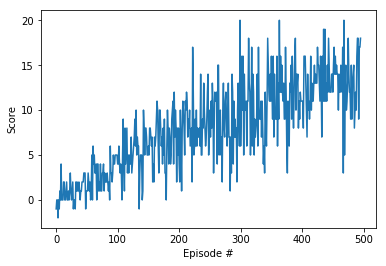

In [13]:
# Save scores for reporting
torch.save(scores, "scores")
import matplotlib.pyplot as plt
%matplotlib inline
# plot the scores
fig = plt.figure()
ax = fig.add_subplot(111)
plt.plot(np.arange(len(scores)), scores)
plt.ylabel('Score')
plt.xlabel('Episode #')
plt.show()

When finished, you can close the environment.

In [ ]:
env.close()